###### This model predicts ham or spam sms using Naive Bayes Classifier.

###### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Importing and studying the data

In [2]:
message = pd.read_csv(r"F:\DATA SCIENCE\MACHINE LEARNING\Naive Bayes Classifier\sms_spam.csv")

In [3]:
message.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Dimensions of the dataset
message.shape

(5574, 2)

There are 5574 observations and 2 columns in the dataset

In [5]:
# Duplicate cheeck
message.duplicated().sum()

414

In [6]:
message[message.duplicated()]

,type,text
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5526,spam,You are awarded a SiPix Digital Camera! call 0...
5537,ham,"I know you are thinkin malaria. But relax, chi..."
5541,ham,Just sleeping..and surfing
5555,ham,Hahaha..use your brain dear


These are the 414 duplicates present in the dataset

In [7]:
# Droping duplicates
message.drop_duplicates(inplace = True, ignore_index = True)

In [8]:
message

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5155,spam,This is the 2nd time we have tried 2 contact u...
5156,ham,Will ü b going to esplanade fr home?
5157,ham,"Pity, * was in mood for that. So...any other s..."
5158,ham,The guy did some bitching but I acted like i'd...


After removing duplicates, we have 5160 observations in the dataset

In [9]:
# Null value check
message.isnull().sum()

type    0
text    0
dtype: int64

There are no null values present in the dataset

In [10]:
# Info of dataset
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5160 non-null   object
 1   text    5160 non-null   object
dtypes: object(2)
memory usage: 80.8+ KB


There are object type features in our dataset

In [11]:
# Studying the target variable - 'type'
# Checking balance of dataset
message['type'].value_counts()

ham     4518
spam     642
Name: type, dtype: int64

In [12]:
percent_ham = round((len(message[message['type'] == 'ham'])/len(message['type']))*100,2)
percent_spam = round((len(message[message['type'] == 'spam'])/len(message['type']))*100,2)
print('Percentage of not spam messages = ',percent_ham,'%')
print('Percentage of spam messages = ',percent_spam,'%')

Percentage of not spam messages =  87.56 %
Percentage of spam messages =  12.44 %


<AxesSubplot:xlabel='type', ylabel='count'>

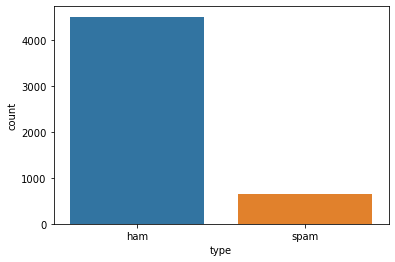

In [13]:
# Visualizing the distribution of target values in count plot
sns.countplot(x = message['type'])

Here event rate is 12.44 % which is not very low. Hence, we will avoid going for undersampling or oversampling methods as we know these methods may create biasness and overfit the model.

In [14]:
message.describe()

,type,text
count,5160,5160
unique,2,5160
top,ham,I hate when she does this. She turns what shou...
freq,4518,1


In [15]:
message.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4518   4518  I hate when she does this. She turns what shou...    1
spam   642    642  Call Germany for only 1 pence per minute! Call...    1

In [16]:
# Adding length of each text message

In [17]:
message['length'] = message['text'].apply(lambda x : len(x))

In [18]:
message.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


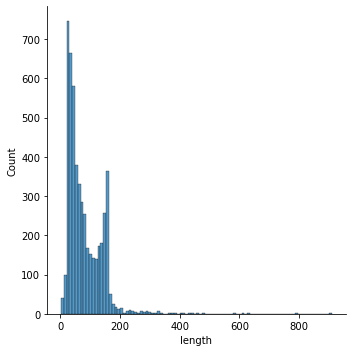

In [19]:
# Visulaizing dist. of length col.
sns.displot(message['length'])

In [20]:
max(message['length'])

910

In [21]:
print(message[message['length'] == max(message['length'])]['text'].iloc[0])

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


###### Text Pre-processing

In [22]:
import string
mess = 'sample message!....'
nopunc = [char for char in mess if char not in string.punctuation]
nopunc = ''.join(nopunc)
print(nopunc)

sample message


In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MAKRAND\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [25]:
nopunc.split()

['sample', 'message']

In [26]:
# Defining text preprocessing function which returns list of words without any punctuation and stopwords in it
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [27]:
message['text'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

###### Feature Engineering and TFIDF

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(message['text'])

In [30]:
bow_transformer.vocabulary_

{'Go': 2058,
 'jurong': 7537,
 'point': 8899,
 'crazy': 5760,
 'Available': 1110,
 'bugis': 5212,
 'n': 8318,
 'great': 6925,
 'world': 11142,
 'la': 7650,
 'e': 6205,
 'buffet': 5211,
 'Cine': 1483,
 'got': 6894,
 'amore': 4647,
 'wat': 10945,
 'Ok': 3059,
 'lar': 7683,
 'Joking': 2445,
 'wif': 11051,
 'u': 10679,
 'oni': 8572,
 'Free': 1939,
 'entry': 6319,
 '2': 423,
 'wkly': 11102,
 'comp': 5611,
 'win': 11063,
 'FA': 1831,
 'Cup': 1551,
 'final': 6545,
 'tkts': 10493,
 '21st': 443,
 'May': 2799,
 '2005': 430,
 'Text': 3948,
 '87121': 871,
 'receive': 9234,
 'questionstd': 9141,
 'txt': 10667,
 'rateTCs': 9182,
 'apply': 4725,
 '08452810075over18s': 73,
 'U': 4062,
 'dun': 6192,
 'say': 9536,
 'early': 6210,
 'hor': 7172,
 'c': 5254,
 'already': 4623,
 'Nah': 2943,
 'dont': 6112,
 'think': 10414,
 'goes': 6865,
 'usf': 10780,
 'lives': 7824,
 'around': 4771,
 'though': 10431,
 'FreeMsg': 1941,
 'Hey': 2220,
 'darling': 5855,
 '3': 543,
 'weeks': 10991,
 'word': 11129,
 'back': 4887

In [31]:
print(len(bow_transformer.vocabulary_))

11401


In [32]:
messages_bow = bow_transformer.transform(message['text'])

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
messages_tfidf = tfidf_transformer.fit_transform(messages_bow)
print(messages_tfidf.shape)

(5160, 11401)


TFIDF has converted text messages into discrete type feature values of features (giving importance to rare words)

###### Multinomial Naive Bayes Classifer

We will use Multinomial Naive Bayes Classifier as features are discrete in nature which is achieved through TFIDF feature engineering technique.


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
message['type'] = le.fit_transform(message['type'])

In [37]:
message.head()

,type,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
x_train, x_test, y_train, y_test = train_test_split(messages_tfidf, message['type'], test_size = 0.2, random_state = 43)

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
spam_detect_model = MultinomialNB() #By default laplace smoothing is applied (alpha = 1)

In [41]:
spam_detect_model.fit(x_train, y_train)

MultinomialNB()

###### Predictions

In [42]:
y_pred = spam_detect_model.predict(x_test)

In [43]:
y_pred 

array([0, 0, 0, ..., 0, 1, 0])

###### Evaluation of model

In [44]:
# Importing evaluation metrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, roc_curve, roc_auc_score, confusion_matrix

In [45]:
# Accuracy, precision, recall and f1 score of the model
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy of model = ',accuracy,'%')
recall = round(recall_score(y_test,y_pred)*100,2)
print('Recall of model = ',recall,'%')
precision = round(precision_score(y_test,y_pred)*100,2)
print('Precision of model = ',precision, '%')
f1 = round(f1_score(y_test,y_pred)*100,2)
print('F1 score of model = ',f1, '%')

Accuracy of model =  95.45 %
Recall of model =  64.39 %
Precision of model =  100.0 %
F1 score of model =  78.34 %


- Here, in this case study, 'precision' is an important criteria. Since, it is 100%, so, we do not have single FPs, i.e.,
  we don't have cases where mails which are not spam and important ones are categorized into spam mails, which is what we require
  as we do not want to loose the important mails into spam box.
- Here, there is scope of improvement in 'recall', as we have some FNs, i.e, there are some mails which are actually spam 
but still we are getting it in our main inbox, so model needs to improve upon that.
- F1 score strikes balance between recall and precision(as we increase precision, we decrease recall and vice-versa)
  by using their harmonic means and punishing extreme values.

In [46]:
# Confusion Matrix
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_mat

,0,1
0,900,0
1,47,85


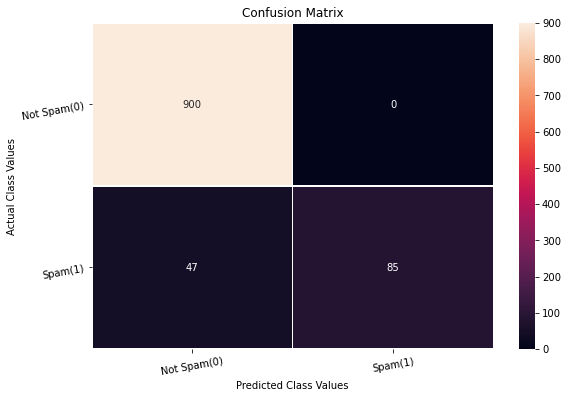

In [49]:
# Visualizing Confusion Matrix - using heatmap
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", linewidths=.5, ax=ax,xticklabels= ['Not Spam(0)','Spam(1)'],
    yticklabels=['Not Spam(0)','Spam(1)'])
plt.xticks(rotation = 10)
plt.yticks(rotation = 10)
plt.xlabel('Predicted Class Values')
plt.ylabel('Actual Class Values')
plt.title('Confusion Matrix')
plt.show()

In [53]:
# Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report of model :-\n',report)

Classification Report of model :-
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       900
           1       1.00      0.64      0.78       132

    accuracy                           0.95      1032
   macro avg       0.98      0.82      0.88      1032
weighted avg       0.96      0.95      0.95      1032



In [60]:
# ROC - AUC Curve
y_prob = pd.DataFrame(spam_detect_model.predict_proba(x_test))

In [61]:
y_prob

,0,1
0,0.997186,0.002814
1,0.994450,0.005550
2,0.876657,0.123343
3,0.983908,0.016092
4,0.991752,0.008248
...,...,...
1027,0.989089,0.010911
1028,0.994539,0.005461
1029,0.996294,0.003706
1030,0.243990,0.756010


In [62]:
y_prob_positive = y_prob.iloc[:, 1]

In [63]:
y_prob_positive

0       0.002814
1       0.005550
2       0.123343
3       0.016092
4       0.008248
          ...   
1027    0.010911
1028    0.005461
1029    0.003706
1030    0.756010
1031    0.010547
Name: 1, Length: 1032, dtype: float64

In [65]:
# Getting False Positive Rate and True Positive rate at various thresholds from AUC - ROC Curve
fpr , tpr , thresholds = roc_curve(y_test, y_prob_positive)

In [67]:
# AUC Score
auc = round(roc_auc_score(y_test, y_prob_positive)*100,2)
print('AUC of ROC Curve = ',auc,'%')

AUC of ROC Curve =  97.51 %


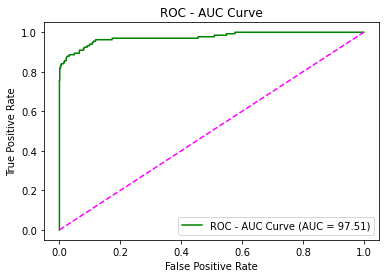

In [77]:
# Plotting ROC - AUC Curve
plt.plot(fpr, tpr, label = f'ROC - AUC Curve (AUC = {auc})', color = 'green')
plt.plot([0,1], [0,1], linestyle = 'dashed', color = 'magenta')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC Curve')
plt.show()

We are getting AUC as 97.5% . Hence, our model is able to distinguish between the classes most of the times.

In [79]:
# Since, Naive Bayes is a probabilistic model (apart from Logistic Regression) whose output is probability value between 0 and 1, so, we have one more evaluation
# matrix log loss / cross entropy loss evaluates the performance of such model, especially useful for imbalanced dataset.
from sklearn.metrics import log_loss

In [81]:
cross_entropy_loss = log_loss(y_test, y_prob)
print('Cross Entropy loss / log loss of the model = ',cross_entropy_loss)

Cross Entropy loss / log loss of the model =  0.13202758576648127


There is log loss of 13% of the model.